In [52]:
%matplotlib inline  
import os

from glob import glob

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

In [10]:
dataset_root = os.path.join('data', 'dataset')
dataset_all = os.path.join(dataset_root, '*')

In [37]:
def get_classes(root):
    classes = glob(os.path.join(dataset_root, '*'))
    classes.sort()
    classes = map(lambda path: os.path.basename(path), classes)
    return list(classes)

def get_class_mapping(classes, labels):
    mapper = {}
    for i, label in enumerate(labels):
        mapper[classes[i]] = label
    return mapper

def get_labels(classes):
    return list(range(0, len(classes)))

def load_dataset(dataset_root, class_mapper):
    dataset = []
    for root, dirs, files in os.walk(dataset_root):
        if len(files) > 0:
            for image_name in files:
                class_name = os.path.basename(root)
                label = class_mapper[class_name]
                path = os.path.join(root, image_name)
                dataset.append([path, label])
    return dataset

In [38]:
classes = get_classes(glob(dataset_all))
classes

['California sycamore',
 'balance',
 'cat',
 'clock pendulum',
 'dog',
 'epacris',
 'feeder',
 'forklift',
 'impeller',
 'kittiwake',
 'military uniform',
 'outrigger',
 'river dolphin',
 'rivet',
 'skyhook']

In [39]:
labels = get_labels(classes)
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [40]:
class_mapper = get_class_mapping(classes, labels)
class_mapper

{'California sycamore': 0,
 'balance': 1,
 'cat': 2,
 'clock pendulum': 3,
 'dog': 4,
 'epacris': 5,
 'feeder': 6,
 'forklift': 7,
 'impeller': 8,
 'kittiwake': 9,
 'military uniform': 10,
 'outrigger': 11,
 'river dolphin': 12,
 'rivet': 13,
 'skyhook': 14}

In [71]:
dataset = load_dataset(dataset_root, class_mapper)
dataset[:5]

[['data/dataset/kittiwake/445834243_f5d80d0929.jpg', 9],
 ['data/dataset/kittiwake/511817052_27a967f207.jpg', 9],
 ['data/dataset/kittiwake/194027008_70fc7415ae.jpg', 9],
 ['data/dataset/kittiwake/59200460_e250bfcc4a.jpg', 9],
 ['data/dataset/kittiwake/429121423_082b5fed1e.jpg', 9]]

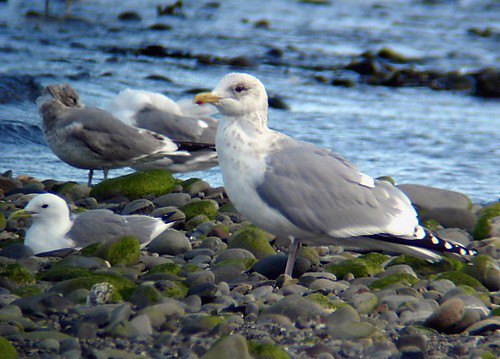

In [72]:
image, label = dataset[0]
Image.open(image)

Image dimentions: (359, 500)


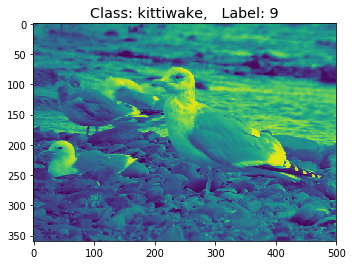

In [99]:
image_vec = cv.imread(image, cv.IMREAD_GRAYSCALE)
print(f'Image dimentions: {image_vec.shape}')

title = f'Class: {classes[label]},   Label: {label}'
fontdict = {'fontsize': 'x-large'}

plt.imshow(image_vec)
_  = plt.title(title, fontdict)